In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv

In [112]:
vals = np.linspace(0,5,100)

S = [0,1/2,1,3/2,2]

ls = []

for i in range(len(S)):
    L = []
    for j in range(100):
        L.append(iv(S[i],vals[j]))
    ls.append(L)

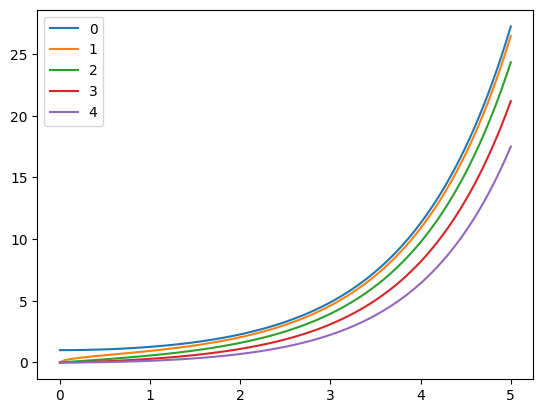

In [113]:
for i in range(len(ls)):
    plt.plot(vals,ls[i],label=f'{i}')
    plt.legend()

In [50]:
from math import factorial

def error(beta,D,N,d):
    return (np.exp((beta-1)**2) * beta**D /factorial(D))**(N*(d-1))
    
error(10,100,3,3)

1.7664293686403326e-137

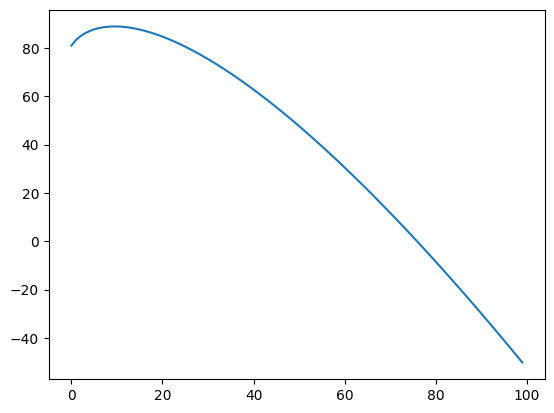

In [70]:
def foo(beta,D):
    return np.exp((beta-1)**2) * beta**D / factorial(D)

foo_vec = np.vectorize(foo)

ls = [foo(10,D) for D in range(100)]

plt.plot(np.arange(0,100),np.log(ls))

In [110]:
from scipy.optimize import newton 

def foo(beta,thresh=1e-2,iterations=100,d=2,N=1):
    x = 100000000
    for _ in range(iterations):
        f = x * (np.log(beta) + 1) - x * np.log(x) - 1/2 * np.log(x) - (beta-1)**2 - 1/2 * np.log(2*np.pi) - 1/(N*(d-1)) * np.log(thresh)
        fp = np.log(beta) - np.log(x) - 1/(2*x)
        x -= f/fp
        print(x)
    return x

foo(10)

6204201.5452938825
465140.65685076267
43271.16421042109
5158.3332560587005
812.8950268042772
166.58155570932558
30.970559978654137
-41.4790497607095
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/var/folders/h7/_hqqwrk517z46v06lptyq1580000gn/T/ipykernel_2453/1714262594.py:6: RuntimeWarning: invalid value encountered in log
  f = x * (np.log(beta) + 1) - x * np.log(x) - 1/2 * np.log(x) - (beta-1)**2 - 1/2 * np.log(2*np.pi) - 1/(N*(d-1)) * np.log(thresh)
/var/folders/h7/_hqqwrk517z46v06lptyq1580000gn/T/ipykernel_2453/1714262594.py:7: RuntimeWarning: invalid value encountered in log
  fp = np.log(beta) - np.log(x) - 1/(2*x)


nan

/Users/leonardocardinale/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


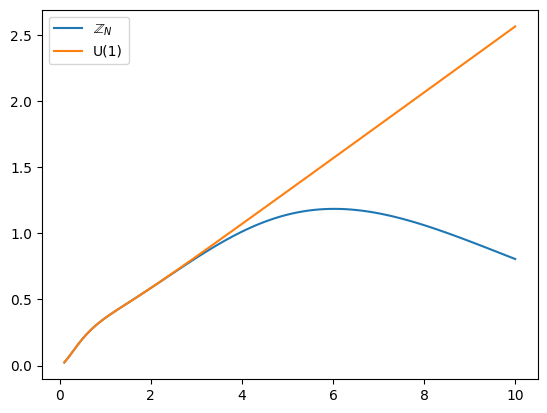

In [3]:
d = 3
from math import factorial

def quotient1(beta):
    s = 0
    t = 0
    for m in range(50):
        s += beta**(2*m)/(factorial(m) * factorial(m))
        t += beta**(2*m+1)/(factorial(m) * factorial(m+1))
    return np.log(s/t)

def quotient(beta,N):
    s = 0
    t = 0
    ks = np.arange(0,N)
    x = np.exp(2*1j*ks*np.pi/N)
    s = np.sum(np.exp(2*beta*(np.real(x))))
    t = np.sum(np.exp(2*beta*(np.real(x))) * x)
    return np.log(s/t)

quotient = np.vectorize(quotient)

betas = np.linspace(0.1,10,100)
vals = np.array([quotient1(beta) for beta in betas])

plt.plot(betas,betas**(2/(4-d))*quotient(betas,10),label=r'$\mathbb{Z}_N$')
plt.plot(betas,betas**(2/(4-d))*vals,label='U(1)')
plt.legend()

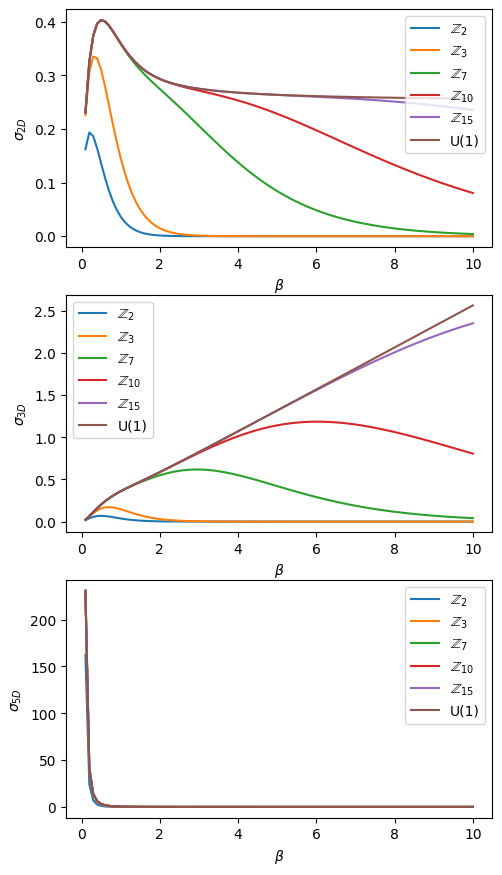

In [18]:
end = 15

N_ls = [2,3,7,10,end]

fig, axs = plt.subplots(3)
for n in N_ls:
    if n != 10 and n != end:
        axs[0].plot(betas,betas**(2/(4-2))*quotient(betas,n),label='$\mathbb{Z}$' + f'$_{n}$')
    elif n == 10:
        axs[0].plot(betas,betas**(2/(4-2))*quotient(betas,n),label='$\mathbb{Z}_{10}$')
    elif n == end:
        axs[0].plot(betas,betas**(2/(4-2))*quotient(betas,n),label='$\mathbb{Z}_{15}$')
axs[0].plot(betas,betas**(2/(4-2))*vals,label='U(1)')
axs[0].set_xlabel(r'$\beta$')
axs[0].set_ylabel(r'$\sigma_{2D}$')
axs[0].legend()
for n in N_ls:
    if n != 10 and n != end:
        axs[1].plot(betas,betas**(2/(4-3))*quotient(betas,n),label='$\mathbb{Z}$' + f'$_{n}$')
    elif n == 10:
        axs[1].plot(betas,betas**(2/(4-3))*quotient(betas,n),label='$\mathbb{Z}_{10}$')
    elif n == end:
        axs[1].plot(betas,betas**(2/(4-3))*quotient(betas,n),label='$\mathbb{Z}_{15}$')
axs[1].plot(betas,betas**(2/(4-3))*vals,label='U(1)')
axs[1].set_xlabel(r'$\beta$')
axs[1].set_ylabel(r'$\sigma_{3D}$')
axs[1].legend()
for n in N_ls:
    if n != 10 and n != end:
        axs[2].plot(betas,betas**(2/(4-5))*quotient(betas,n),label='$\mathbb{Z}$' + f'$_{n}$')
    elif n == 10:
        axs[2].plot(betas,betas**(2/(4-5))*quotient(betas,n),label='$\mathbb{Z}_{10}$')
    elif n == end:
        axs[2].plot(betas,betas**(2/(4-5))*quotient(betas,n),label='$\mathbb{Z}_{15}$')
axs[2].plot(betas,betas**(2/(4-5))*vals,label='U(1)')
axs[2].set_xlabel(r'$\beta$')
axs[2].set_ylabel(r'$\sigma_{5D}$')
axs[2].legend()
fig.set_size_inches(5.5, 10.5)
plt.savefig('ZN.png')

'$A = x$'